# Assignment 1
## Problem 2
Using the diabetes dataset provided in the zip folder, build a classifier based on naïve Bayes rule. The provided dataset is one of the most commonly used datasets in the machine learning field. The dataset has 8 attributes which are the number of times pregnant, plasma glucose concentration, diastolic blood pressure, triceps skin fold thickness, 2-Hour serum insulin, body mass index, diabetes pedigree function, and age along with two classes (positive test and negative test) for each of n = 768 patients.
### **Step 1:**
Read data and inspect.

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
from scipy.stats import norm

file_name = 'diabetes_csv.csv'

dataframe = pd.read_csv(file_name)
dataframe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


Make sure no null values are present:

In [2]:
dataframe.count()

preg     768
plas     768
pres     768
skin     768
insu     768
mass     768
pedi     768
age      768
class    768
dtype: int64

Make sure we have a good number of both classes present in the datset:

In [3]:
dataframe.groupby('class').size()

class
tested_negative    500
tested_positive    268
dtype: int64

### **Step 2:** 
Shuffle data

In [4]:
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
dataframe.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0,101,62,0,0,21.9,0.336,25,tested_negative
1,3,81,86,16,66,27.5,0.306,22,tested_negative
2,4,84,90,23,56,39.5,0.159,25,tested_negative
3,1,109,60,8,182,25.4,0.947,21,tested_negative
4,2,125,60,20,140,33.8,0.088,31,tested_negative


Split dataframe into training & testing samples:

In [5]:
instance_count = len(dataframe.index)
training_count = int(0.75 * instance_count)

training_df = dataframe.iloc[ : training_count , : ]
testing_df = dataframe.iloc[training_count : , : ]

print("Number of training instances: ", len(training_df.index), ", Number of testing instances: ", len(testing_df.index), ".")

Number of training instances:  576 , Number of testing instances:  192 .


### **Step 3:** 
Split data by class

In [6]:
class_pos = training_df[training_df['class'] == 'tested_positive']
class_neg = training_df[training_df['class'] == 'tested_negative']

# Remove label column
class_pos = class_pos.iloc[:, : -1]
class_neg = class_neg.iloc[:, : -1]

**Computing liklihood for each feature:**

To compute the liklihood for each feature for each class we have to decide first if the feature is a categorical or a continues valued feature, from inspecting the data in the first cell, and from feature descriptions in the problem statement, we observe that the features: _plasma glucose concentration, diastolic blood pressure, triceps skin fold thickness, 2-Hour serum insulin, body mass index, diabetes pedigree function, and age_ are all continues features, but _number of times pregnant_ can be argued that it's a **discrete but numerical** feature.

In that case we can compute the liklihood for that feature using discrete Naive Bayes, but for my solution I'm processing the number of times pregnangt as a continues feature.

**Computing mean and standard deviation vectors for each class:** 

in order to calculate _liklihood_ for each feature for each class.

In [7]:
class_pos_mean = class_pos.mean()
class_pos_std = class_pos.std()

class_neg_mean = class_neg.mean()
class_neg_std = class_neg.std()

### Step 4:
Compute Liklihood of each feature for each class:

**A.** Compute prior prabability of each class:

In [8]:
prior_pos = len(class_pos.index) / training_count
prior_neg = len(class_neg.index) / training_count

# Confirm our calculations are correct:
print("Probability of negative or postive prediction = ", (prior_pos + prior_neg) * 100, "%.")

Probability of negative or postive prediction =  100.0 %.


**B.** Build model (function) to predict class given a vector of feautres:
In the function, we first compute the liklihood of all features given each class, then compute the probability of a sample with features _v_ being in _class=pos_ and the probability of it in _class=neg_ and returning the class with the highest probability.

In [9]:
# Returns a prediction for a set of features v
def Predict(v):
    # Compute liklihood for each class
    liklihood_pos = norm.pdf(v, class_pos_mean, class_pos_std)
    liklihood_neg = norm.pdf(v, class_neg_mean, class_neg_std)
    
    # Compute probability of each class
    prob_pos = reduce(lambda x, y: x*y, liklihood_pos ) * prior_pos # (Product of all liklihoods) * prior probability
    prob_neg = reduce(lambda x, y: x*y, liklihood_neg ) * prior_neg
    
    # Return class with maximum probabilty
    if prob_pos > prob_neg:
        return "tested_positive"
    else:
        return "tested_negative"

What a prediction would look like:

In [10]:
Predict([1, 89, 66, 23, 94, 28.1, 0.167, 21])

'tested_negative'

### Step 5
Testing on the test set:

In [11]:
# First split labels from test set:
testing_features = testing_df.iloc[:,:-1]
testing_labels_df = testing_df.iloc[:,-1:]

test_labels = [] # Convert df to list
for i in testing_labels_df.values:
    test_labels.append(i[0])
    
# Make a prediction on all testing instances
prediction = []
for row in (testing_features.values):
    prediction.append(Predict(row))

### Step 6
Computing accuracy, percesion & recall:

In [12]:
true_pos = 0
true_neg = 0
false_pos = 0
false_neg = 0

# Count parameters by comparing the prediction labels to the testing labels:
for i in range(len(prediction)):
    if prediction[i] == test_labels[i]:
        # This is a true prediction
        # Check if it was a postive or negative true prediction
        if 'tested_positive' in prediction[i]:
            true_pos += 1
        else:
            true_neg += 1
            
    else:
        # This is a false prediction
        # Check if it was a postive or negative false prediction
        if 'tested_positive' in prediction[i]:
            false_pos += 1
        else:
            false_neg += 1

# Compute accuracy
accuracy = (true_pos + true_neg) / len(prediction)

# Compute percesion
precision = true_pos / (true_pos + false_pos)

# Compute recall
recall = true_pos / (true_pos + false_neg)

print("Accuracy = ",accuracy,"\nPercision = ",precision,"\nRecall = ",recall)

Accuracy =  0.7395833333333334 
Percision =  0.631578947368421 
Recall =  0.5538461538461539


Now train a Gaussian Naive Bayes model using sickit learn and compare results:

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

y_train = training_df.iloc[:,-1:]
y_train = y_train.values.ravel()
x_train = training_df.iloc[:,:-1]
x_test = testing_features
y_test = testing_labels_df

model = GaussianNB()
model.fit(x_train, y_train) #y_train.values.ravel()
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7395833333333334


### Step 7
Plotting features

/Users/anfalalatawi/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


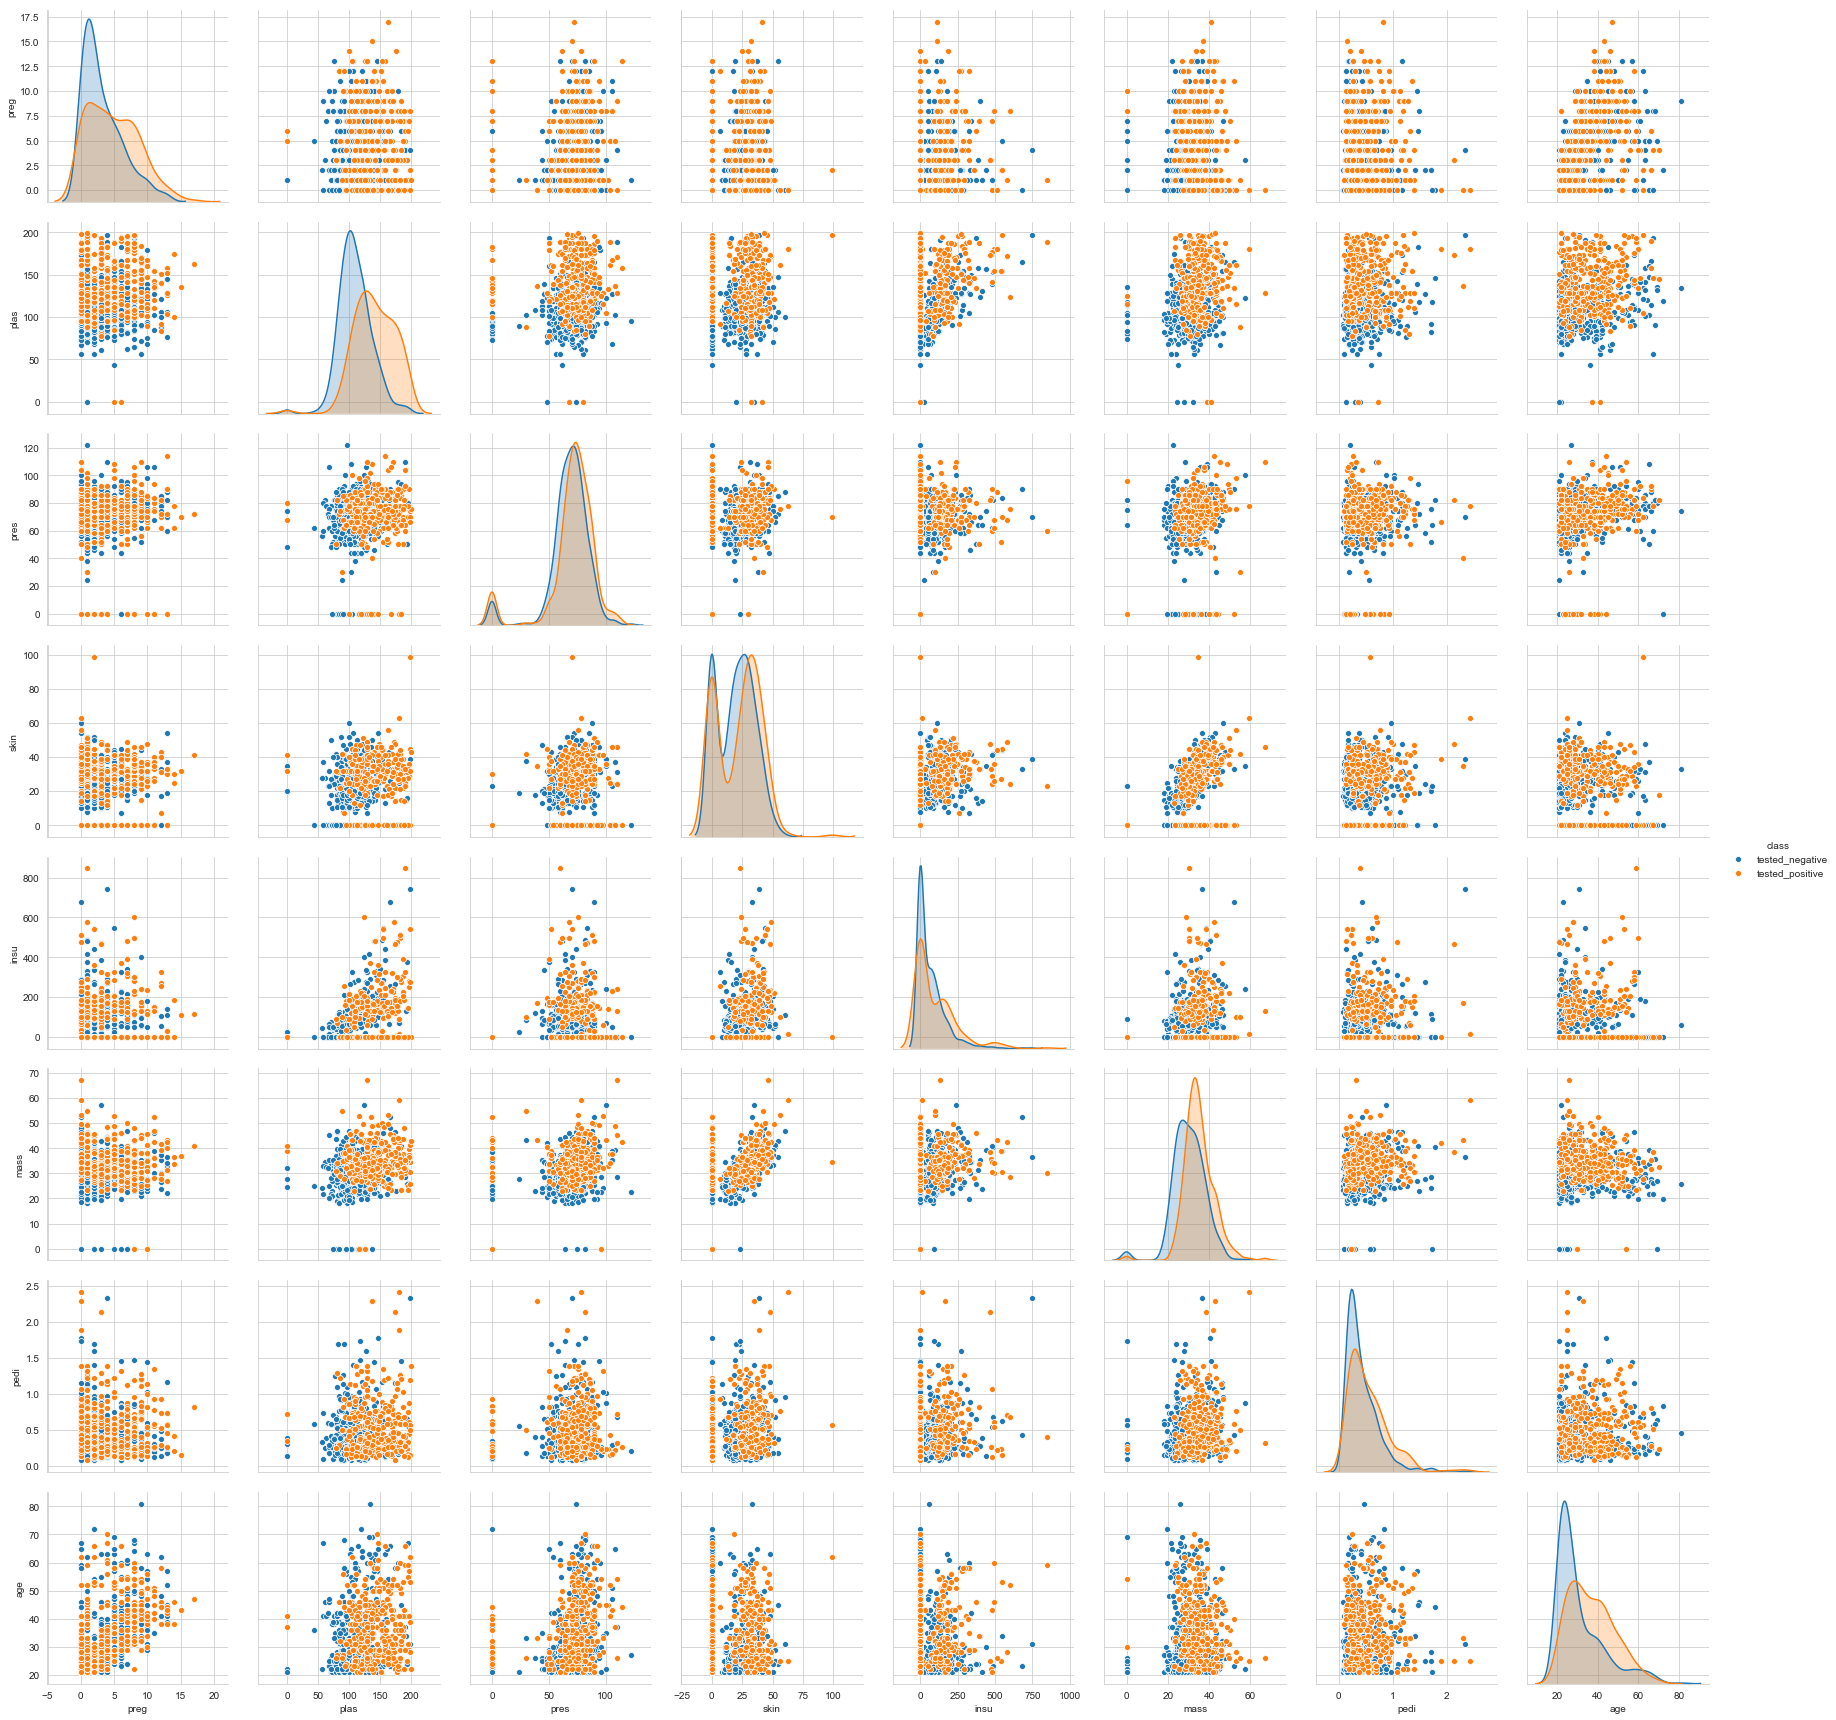

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns


sns.set_style("whitegrid");
sns.pairplot(dataframe, hue="class", palette="husl", height=3);
plt.show()

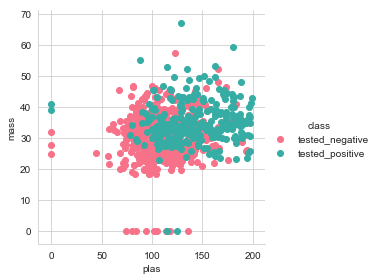

In [15]:
sns.FacetGrid(dataframe, hue="class", palette="husl", height=4) \
   .map(plt.scatter, "plas", "mass") \
   .add_legend()
plt.show()

## Conclusion
- (Model accuracy & comparison to theory & implemented model with the same split.)
- (Highest correlation features)


## Problem 3
Using the diabetes dataset again, perform a classification using KNN algorithm. To implement a KNN algorithm.

I will be using the same split as above.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(n_neighbors=1, weights='uniform')
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.671875


In [17]:
m = KNeighborsClassifier(n_neighbors=3, weights='uniform')
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6822916666666666


In [18]:
m = KNeighborsClassifier(n_neighbors=5, weights='uniform')
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.71875


In [19]:
m = KNeighborsClassifier(n_neighbors=10, weights='uniform')
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7447916666666666


In [20]:
m = KNeighborsClassifier(n_neighbors=15, weights='uniform')
m.fit(x_train, y_train)
y_pred = m.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7395833333333334


# Conclusion
